In [77]:
from sklearn.datasets import load_iris

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Задание 1

In [80]:
iris = load_iris(as_frame = True)

X = iris['data']
X.columns = ['s_length', 's_width', 'p_length', 'p_width']
y = pd.DataFrame(pd.Categorical.from_codes(iris.target, iris.target_names), columns = ['species'])

pd.concat([X, y], axis = 1).head(10)

,s_length,s_width,p_length,p_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
print(f'Количество объектов с NaN: {X.isnull().any(axis = 1).sum()}') 

Количество объектов с NaN: 0


In [5]:
X.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
decision_tree = DecisionTreeClassifier().fit(X, y)

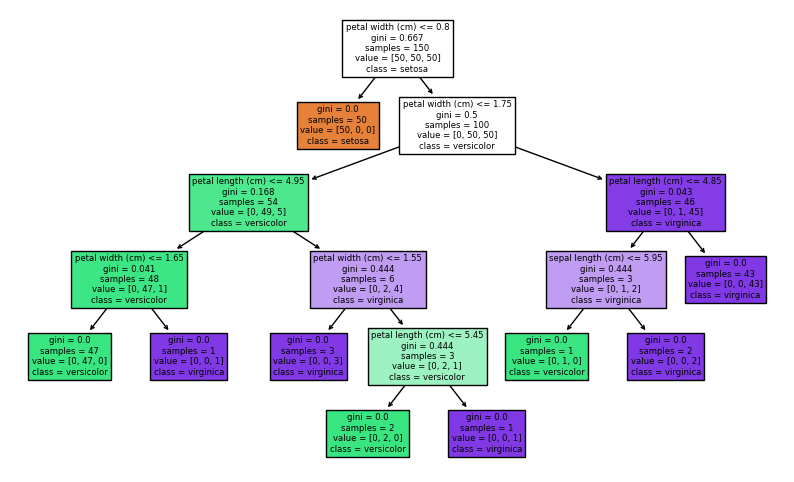

In [8]:
fig = plt.figure(figsize = (10, 6))

_ = plot_tree(decision_tree,
              feature_names = iris.feature_names,  
              class_names = list(iris.target_names),
              filled = True)

plt.show()

# Задание 2

In [81]:
gradBoost = GradientBoostingClassifier().fit(X, y)

In [82]:
importances = {iris.feature_names[i] : [gradBoost.feature_importances_[i]] for i in range(len(iris.feature_names))}
importances = pd.DataFrame(importances)

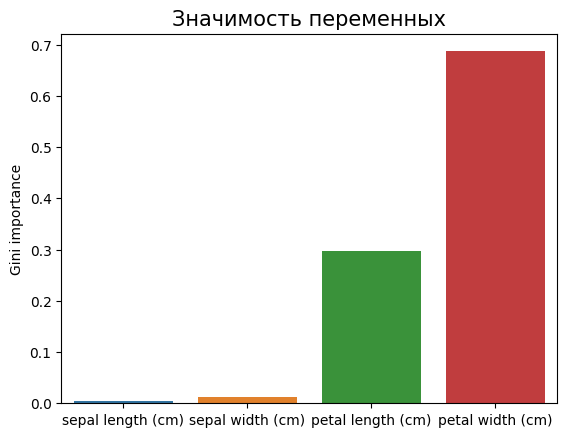

In [83]:
fig, ax = plt.subplots(1, 1)

sns.barplot(importances, ax = ax)

ax.set_ylabel('Gini importance')
plt.title('Значимость переменных', size = 15)
plt.show()

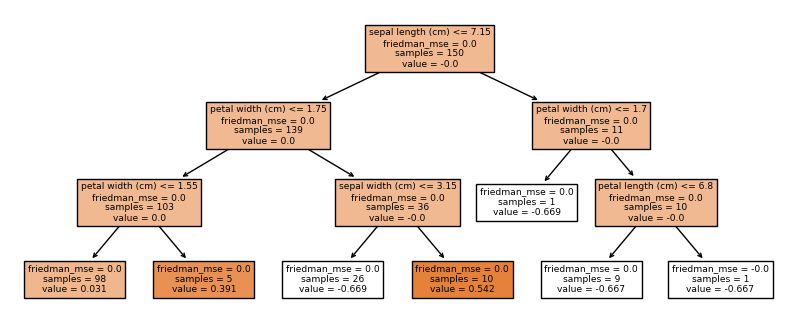

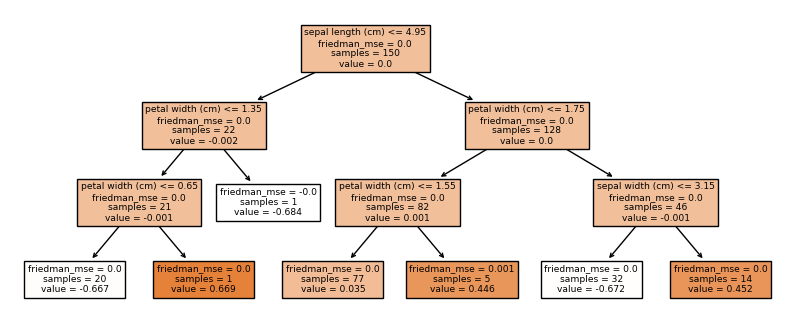

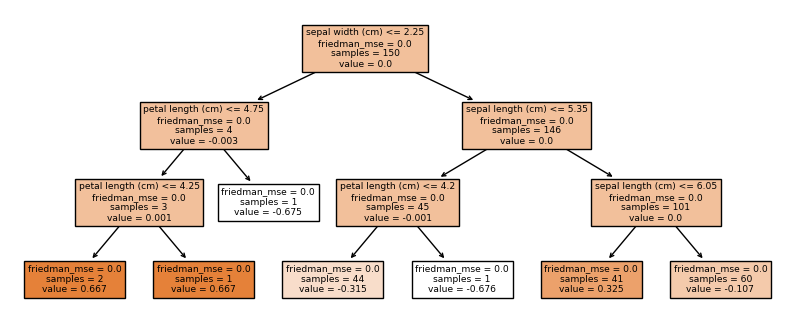

In [12]:
for i in range(3):
    plt.figure(figsize = (10, 4))

    plot_tree(np.random.choice(gradBoost.estimators_[:, 1]),
              feature_names = iris.feature_names,  
              class_names = list(iris.target_names),
              filled = True)
    
    plt.show()

# Задание 3

In [64]:
def accuracy_plot(x, train_accs, valid_accs, **kwards):
    plt.figure(figsize = (10, 4))

    plt.plot(x, train_accs, linewidth = 2, label = 'train')
    plt.plot(x, valid_accs, linewidth = 2, label = 'validation')

    plt.xlabel(kwards.get('xlabel')) 
    plt.ylabel('Accuracy, %')

    plt.xticks(kwards.get('xticks'))
    plt.yticks(kwards.get('yticks'))

    plt.title(kwards.get('title'))

    plt.legend()
    plt.grid()

    plt.show()

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)

In [68]:
train_accs = []
valid_accs = []

nodes_cnts = list(range(2, 20)) 

for n in nodes_cnts:

    gradBoost = GradientBoostingClassifier(n_estimators = 10, 
                                           max_leaf_nodes = n)
    gradBoost = gradBoost.fit(X_train, y_train)

    train_accs.append(accuracy_score(y_train, gradBoost.predict(X_train)) * 100)
    valid_accs.append(accuracy_score(y_val, gradBoost.predict(X_val)) * 100)

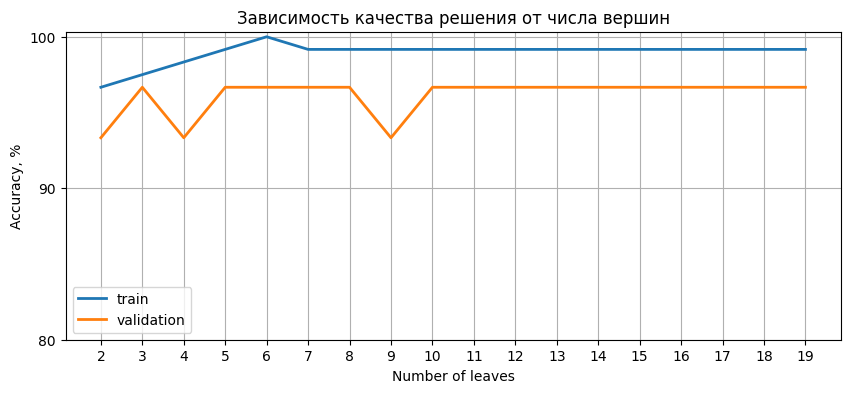

In [69]:
accuracy_plot(nodes_cnts, train_accs, valid_accs, xticks = nodes_cnts, yticks = range(80, 101, 10),
              xlabel = 'Number of leaves', title = 'Зависимость качества решения от числа вершин')

# Задание 4

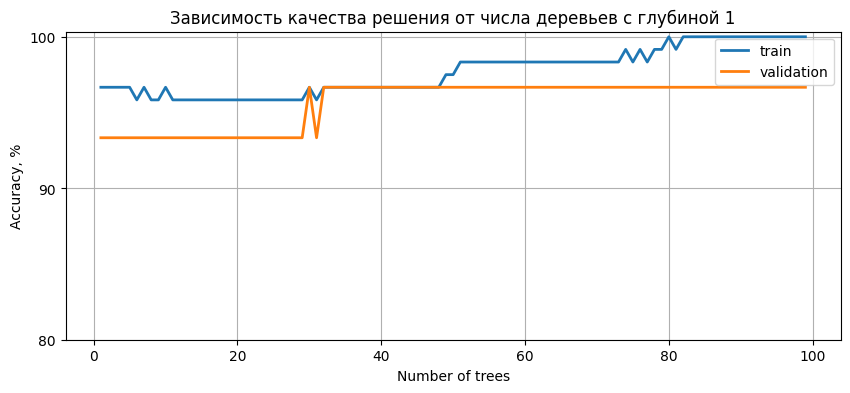

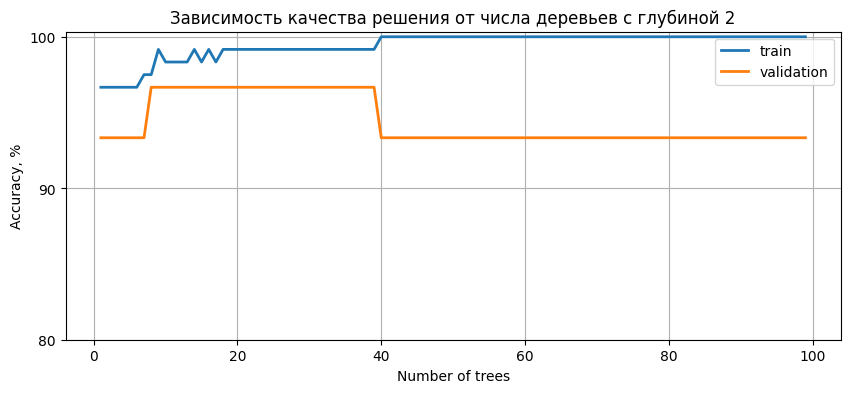

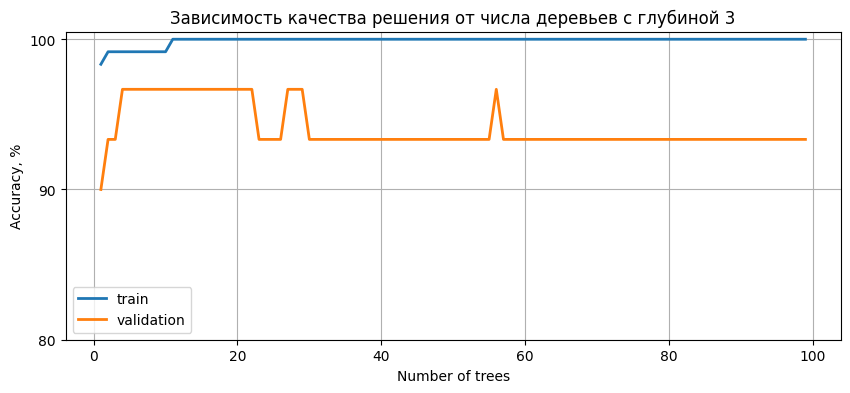

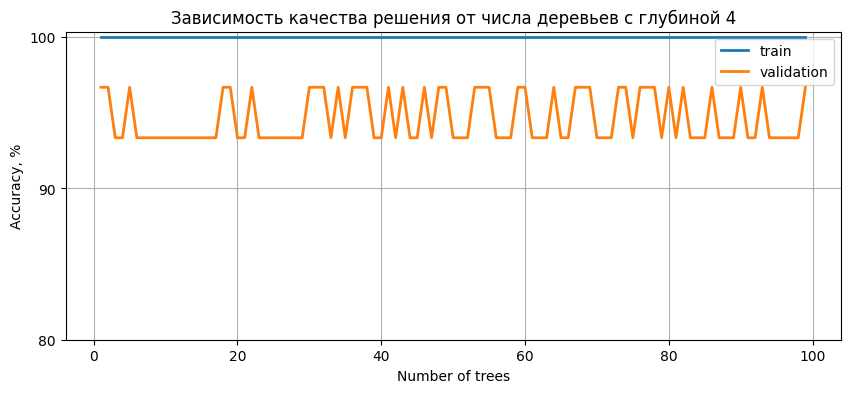

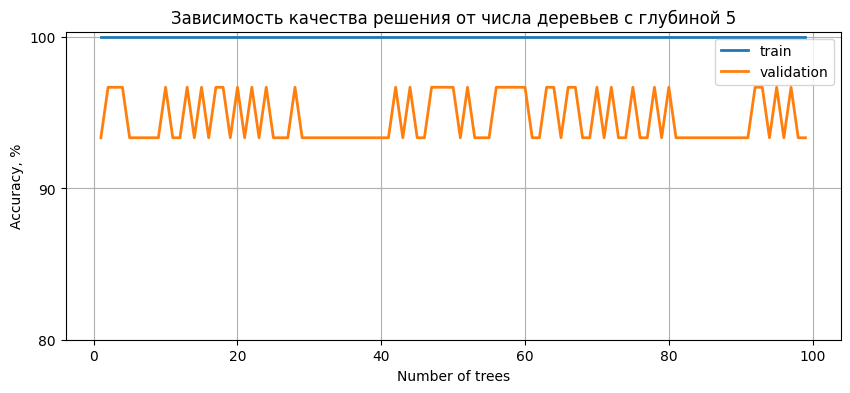

In [76]:
for depth in range(1, 6):

    train_accs = []
    valid_accs = []

    n_estimators = list(range(1, 100)) 

    for n in n_estimators:

        gradBoost = GradientBoostingClassifier(n_estimators = n,
                                               max_depth = depth)
        gradBoost = gradBoost.fit(X_train, y_train)

        train_accs.append(accuracy_score(y_train, gradBoost.predict(X_train)) * 100)
        valid_accs.append(accuracy_score(y_val, gradBoost.predict(X_val)) * 100)

    accuracy_plot(n_estimators, train_accs, valid_accs, yticks = range(80, 101, 10),
                  xlabel = 'Number of trees', title = f'Зависимость качества решения от числа деревьев с глубиной {depth}')

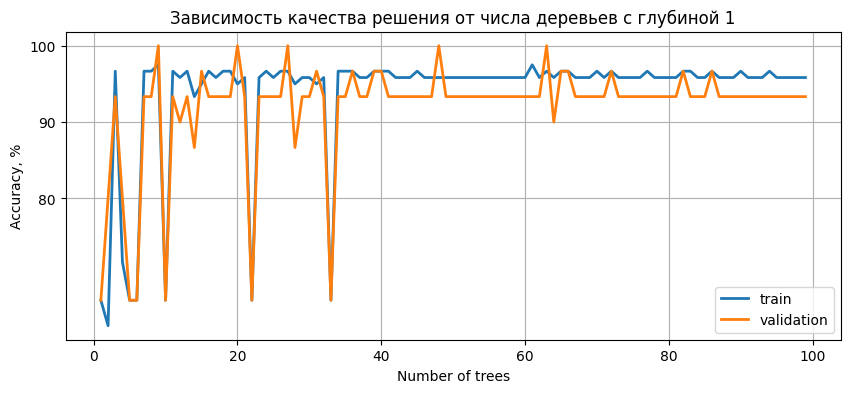

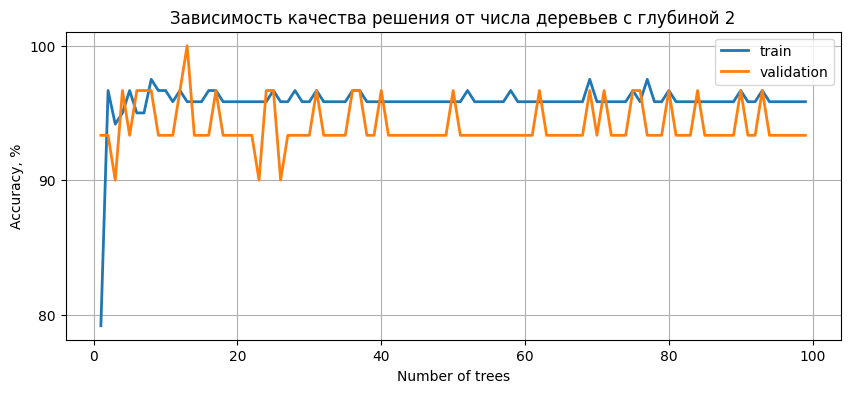

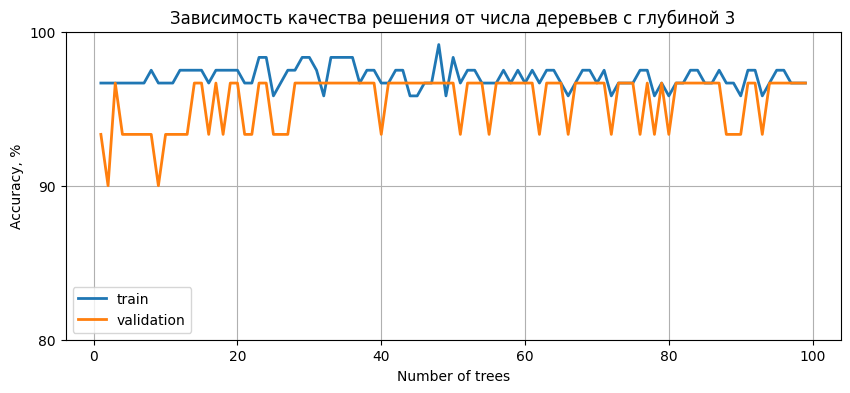

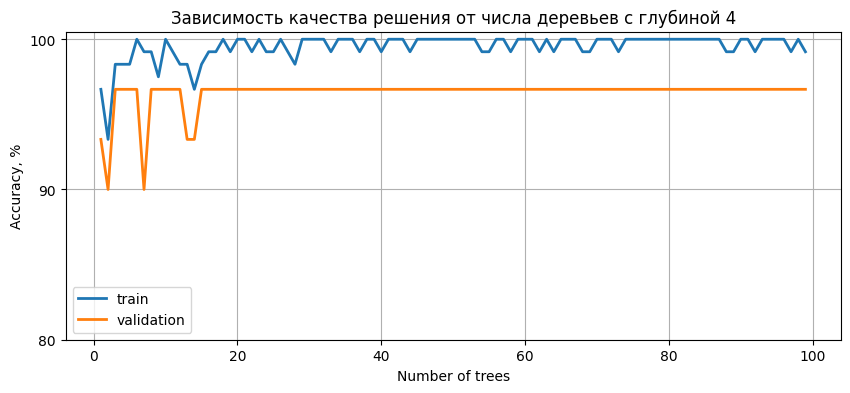

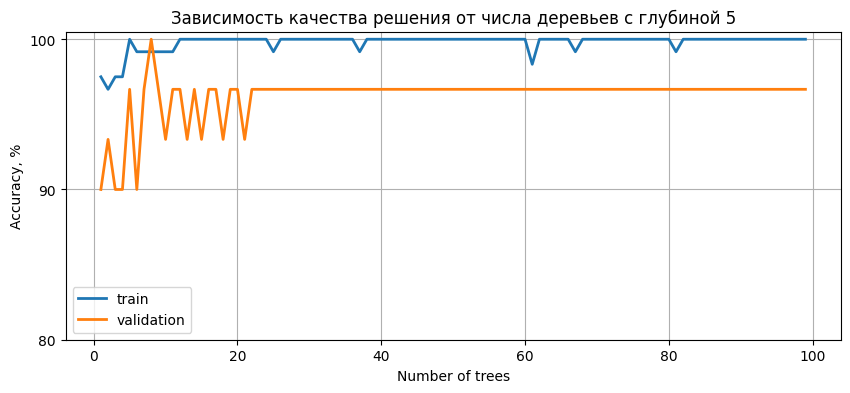

In [79]:
for depth in range(1, 6):

    train_accs = []
    valid_accs = []

    n_estimators = list(range(1, 100)) 

    for n in n_estimators:

        gradBoost = RandomForestClassifier(n_estimators = n,
                                           max_depth = depth)
        gradBoost = gradBoost.fit(X_train, y_train)

        train_accs.append(accuracy_score(y_train, gradBoost.predict(X_train)) * 100)
        valid_accs.append(accuracy_score(y_val, gradBoost.predict(X_val)) * 100)

    accuracy_plot(n_estimators, train_accs, valid_accs, yticks = range(80, 101, 10),
                  xlabel = 'Number of trees', title = f'Зависимость качества решения от числа деревьев с глубиной {depth}')